In [3]:
import pandas as pd


df = pd.read_csv("C:/Users/DELL/Downloads/Cardio_Data.csv")
df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target
0,50.391781,m,168,62,110,80,1,1,0,0,1,0
1,55.419178,f,156,85,140,90,3,1,0,0,1,1
2,51.663014,f,165,64,130,70,3,1,0,0,0,1
3,48.282192,m,169,82,150,100,1,1,0,0,1,1
4,47.873973,f,156,56,100,60,1,1,0,0,0,0


Null values:
 age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
target         0
dtype: int64


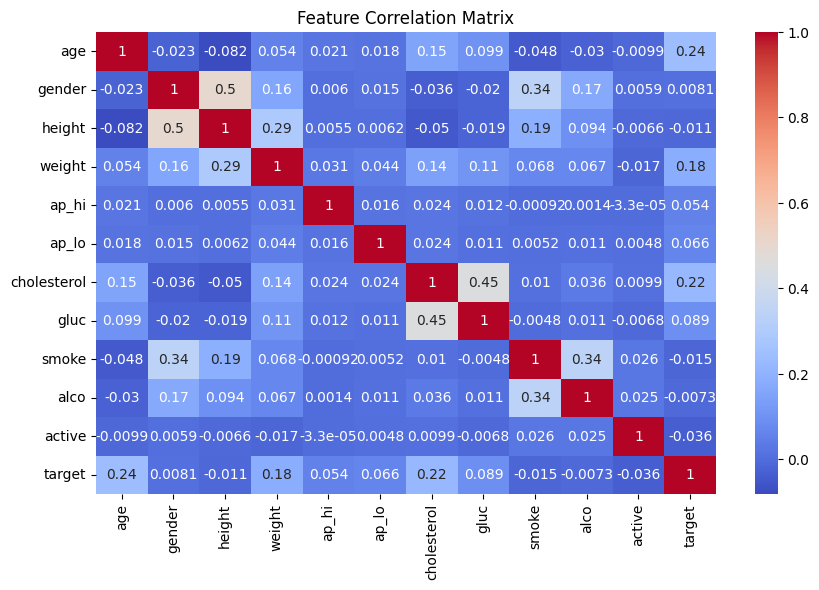

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


df['gender'] = LabelEncoder().fit_transform(df['gender'])


print("Null values:\n", df.isnull().sum())



# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

#

In [8]:

X = df.drop("target", axis=1)
y = df["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LogisticRegression

# Plain Logistic Regression
model_plain = LogisticRegression()
model_plain.fit(X_train, y_train)


LogisticRegression()

In [10]:
# L1 Regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)

# L2 Regularization (Ridge)
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(X_train, y_train)

# Elastic Net Regularization (combines L1 and L2)
model_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model_en.fit(X_train, y_train)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')


--- Plain Logistic Regression ---
Accuracy: 0.7236428571428571
Precision: 0.7458157359612075
Recall: 0.6799771819737592
F1 Score: 0.7113763521074226
ROC AUC: 0.7858872381175979


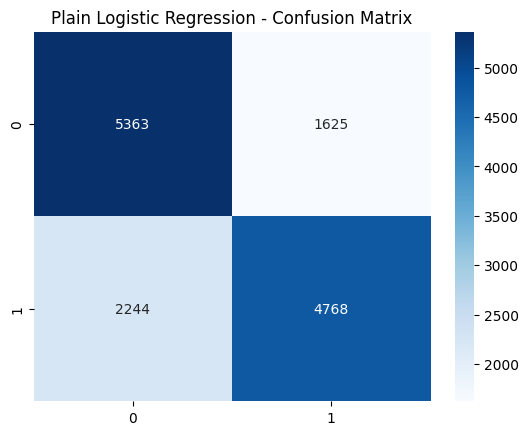


--- L1 Regularized Logistic Regression ---
Accuracy: 0.7241428571428571
Precision: 0.7463246793869253
Recall: 0.6805476326297776
F1 Score: 0.7119200358048635
ROC AUC: 0.7860863815599783


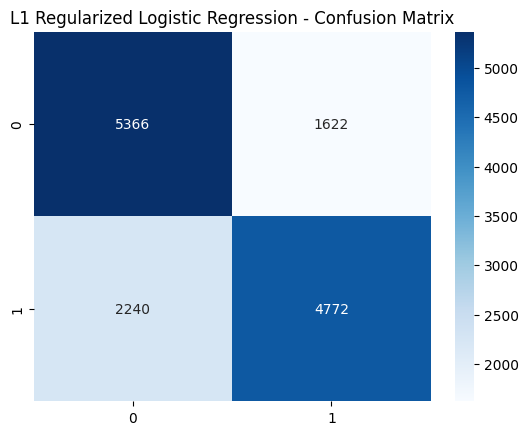


--- L2 Regularized Logistic Regression ---
Accuracy: 0.7236428571428571
Precision: 0.7458157359612075
Recall: 0.6799771819737592
F1 Score: 0.7113763521074226
ROC AUC: 0.7858872381175979


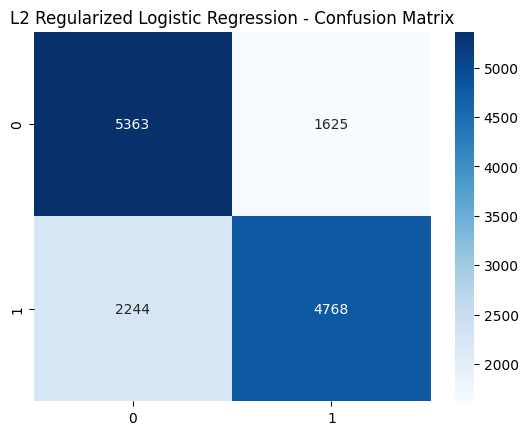


--- Elastic Net Logistic Regression ---
Accuracy: 0.7205714285714285
Precision: 0.7412075941487706
Recall: 0.6792641186537365
F1 Score: 0.7088852507813663
ROC AUC: 0.7840798858674198


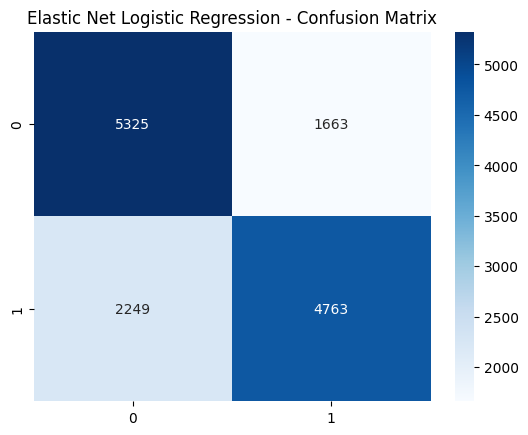

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

evaluate_model(model_plain, "Plain Logistic Regression")
evaluate_model(model_l1, "L1 Regularized Logistic Regression")
evaluate_model(model_l2, "L2 Regularized Logistic Regression")
evaluate_model(model_en, "Elastic Net Logistic Regression")


param grid search for hyper param tunning 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Define parameter grid for L1-regularized logistic regression
param_grid_l1 = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1'],
    'solver': ['liblinear']
}

# Grid search with 5-fold CV
grid_l1 = GridSearchCV(LogisticRegression(), param_grid_l1, cv=5, scoring='f1')
grid_l1.fit(X_train, y_train)
best_l1 = grid_l1.best_estimator_

# Define parameter grid for Elastic Net
param_grid_en = {
    'C': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.25, 0.5, 0.75],
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'max_iter': [10000]
}

grid_en = GridSearchCV(LogisticRegression(), param_grid_en, cv=5, scoring='f1')
grid_en.fit(X_train, y_train)
best_en = grid_en.best_estimator_

kfold cros validatio 

In [13]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_l1 = cross_val_score(best_l1, X_scaled, y, cv=cv, scoring='f1')
scores_en = cross_val_score(best_en, X_scaled, y, cv=cv, scoring='f1')

precision and recall curve

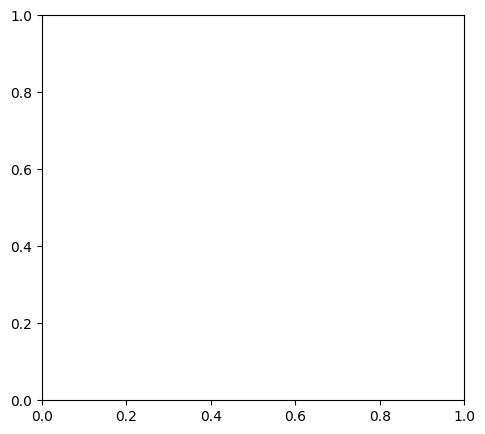

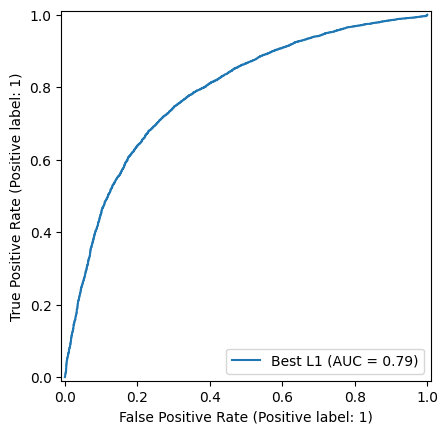

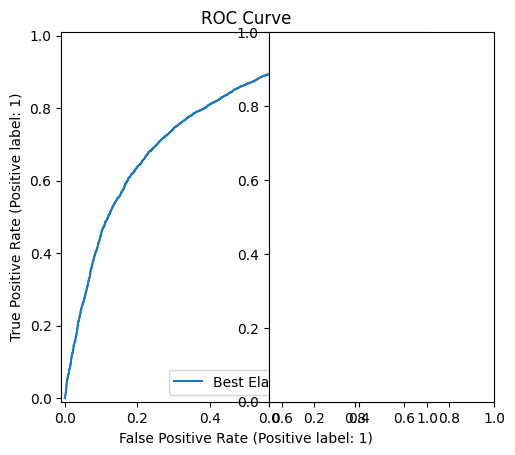

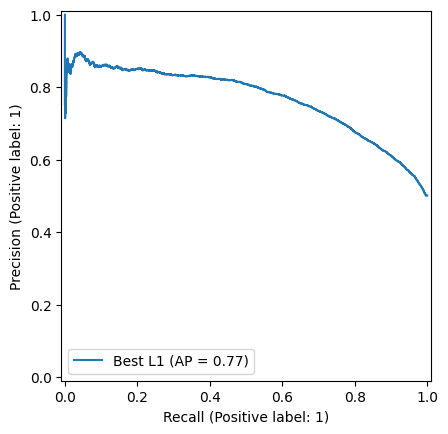

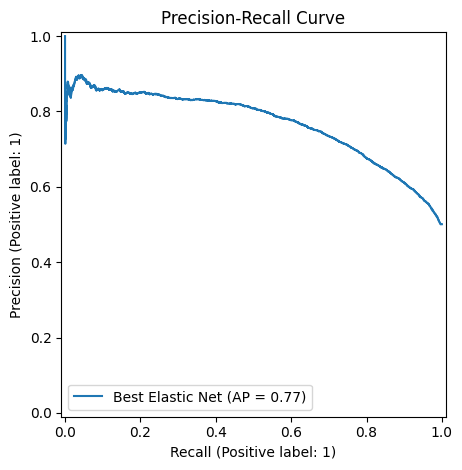

L1 Mean F1 Score (CV): 0.708484869454368
Elastic Net Mean F1 Score (CV): 0.7085066997864888


In [14]:
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
RocCurveDisplay.from_estimator(best_l1, X_test, y_test, name="Best L1")
RocCurveDisplay.from_estimator(best_en, X_test, y_test, name="Best Elastic Net")
plt.title("ROC Curve")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
PrecisionRecallDisplay.from_estimator(best_l1, X_test, y_test, name="Best L1")
PrecisionRecallDisplay.from_estimator(best_en, X_test, y_test, name="Best Elastic Net")
plt.title("Precision-Recall Curve")

plt.tight_layout()
plt.show()

# Print mean F1 scores
print("L1 Mean F1 Score (CV):", scores_l1.mean())
print("Elastic Net Mean F1 Score (CV):", scores_en.mean())